<a href="https://colab.research.google.com/github/anandchauhan21/Desing_of_Data_Structures/blob/main/Module6/Lesson28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌳 Lesson 28: AVL Trees & Red-Black Trees

## 🎯 Objective:
Understand **balanced binary search trees** –  
how **AVL Trees** and **Red-Black Trees** maintain balance during operations.

---

## ⚖️ AVL Trees
- Named after Adelson-Velsky and Landis (1962).  
- **Height-balanced BST**:  
  - For every node: |height(left) – height(right)| ≤ 1  
- Operations: Insertion, Deletion with **rotations**  
  - **LL Rotation** (Right Rotation)  
  - **RR Rotation** (Left Rotation)  
  - **LR Rotation** (Left-Right)  
  - **RL Rotation** (Right-Left)

---

## 🟥⚫ Red-Black Trees
- A **self-balancing BST** with extra property:  
  - Each node is either **Red** or **Black**  
  - Root is always Black  
  - No two consecutive Reds  
  - Every path from root → leaf has same # of Black nodes  

- Balancing via **color flips** & **rotations**.  
- Widely used in **OS kernels, Maps, Sets, STL, Java TreeMap**.

---

## 🌳 Example: AVL Tree Balancing

Insert sequence: [10, 20, 30]  
- BST becomes skewed → Rotation applied  
- Balanced AVL after **LL Rotation**:


In [25]:
def ascii_avl_rotation():
    print("Before LL Rotation (Unbalanced):")
    print("""
        10
          \\
           20
             \\
              30
    """)
    print("After LL Rotation (Balanced):")
    print("""
          20
         /  \\
       10    30
    """)
ascii_avl_rotation()


Before LL Rotation (Unbalanced):

        10
          \
           20
             \
              30
    
After LL Rotation (Balanced):

          20
         /  \
       10    30
    


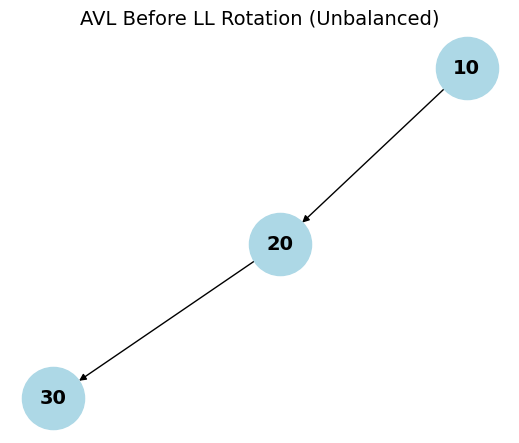

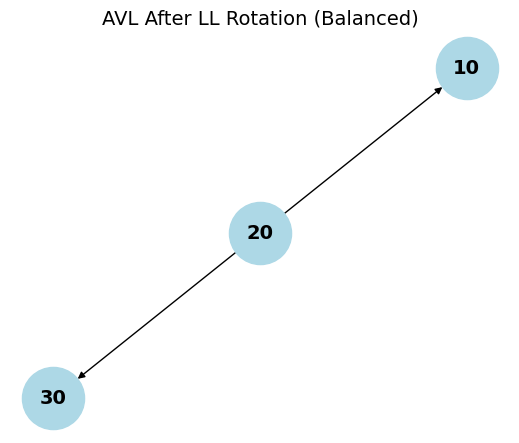

In [26]:
import matplotlib.pyplot as plt
import networkx as nx

edges_unbalanced=[("10","20"),("20","30")]
edges_balanced=[("20","10"),("20","30")]

def draw_tree(edges,title):
    G=nx.DiGraph()
    G.add_edges_from(edges)
    pos=nx.spring_layout(G,seed=42)
    plt.figure(figsize=(5,4))
    nx.draw(G,pos,with_labels=True,node_size=2000,node_color="lightblue",font_size=14,font_weight="bold")
    plt.title(title,fontsize=14)
    plt.show()

draw_tree(edges_unbalanced,"AVL Before LL Rotation (Unbalanced)")
draw_tree(edges_balanced,"AVL After LL Rotation (Balanced)")


## Python

In [27]:
# ⚖️ AVL Tree in Python

class Node:
    def __init__(self,key):
        self.key=key
        self.left=None
        self.right=None
        self.height=1

def height(root):
    return root.height if root else 0

def getBalance(root):
    return height(root.left)-height(root.right) if root else 0

def rightRotate(y):
    x=y.left
    T2=x.right
    x.right=y
    y.left=T2
    y.height=1+max(height(y.left),height(y.right))
    x.height=1+max(height(x.left),height(x.right))
    return x

def leftRotate(x):
    y=x.right
    T2=y.left
    y.left=x
    x.right=T2
    x.height=1+max(height(x.left),height(x.right))
    y.height=1+max(height(y.left),height(y.right))
    return y

def insert(root,key):
    if not root: return Node(key)
    if key<root.key: root.left=insert(root.left,key)
    elif key>root.key: root.right=insert(root.right,key)
    else: return root

    root.height=1+max(height(root.left),height(root.right))
    balance=getBalance(root)

    if balance>1 and key<root.left.key: return rightRotate(root)
    if balance<-1 and key>root.right.key: return leftRotate(root)
    if balance>1 and key>root.left.key:
        root.left=leftRotate(root.left); return rightRotate(root)
    if balance<-1 and key<root.right.key:
        root.right=rightRotate(root.right); return leftRotate(root)

    return root

def inorder(root):
    if root: inorder(root.left); print(root.key,end=" "); inorder(root.right)

# 🔍 Test
root=None
for val in [10,20,30,40,50,25]:
    root=insert(root,val)

print("AVL Inorder Traversal (Balanced):",end=" ")
inorder(root); print()


AVL Inorder Traversal (Balanced): 10 20 25 30 40 50 


## C++

In [28]:
cpp_code = """
#include <iostream>
using namespace std;

struct Node{
    int key,height;
    Node* left; Node* right;
    Node(int val){ key=val; height=1; left=right=NULL; }
};

int height(Node* n){ return n? n->height:0; }
int getBalance(Node* n){ return n? height(n->left)-height(n->right):0; }

Node* rightRotate(Node* y){
    Node* x=y->left; Node* T2=x->right;
    x->right=y; y->left=T2;
    y->height=1+max(height(y->left),height(y->right));
    x->height=1+max(height(x->left),height(x->right));
    return x;
}

Node* leftRotate(Node* x){
    Node* y=x->right; Node* T2=y->left;
    y->left=x; x->right=T2;
    x->height=1+max(height(x->left),height(x->right));
    y->height=1+max(height(y->left),height(y->right));
    return y;
}

Node* insert(Node* node,int key){
    if(!node) return new Node(key);
    if(key<node->key) node->left=insert(node->left,key);
    else if(key>node->key) node->right=insert(node->right,key);
    else return node;
    node->height=1+max(height(node->left),height(node->right));
    int balance=getBalance(node);
    if(balance>1 && key<node->left->key) return rightRotate(node);
    if(balance<-1 && key>node->right->key) return leftRotate(node);
    if(balance>1 && key>node->left->key){ node->left=leftRotate(node->left); return rightRotate(node); }
    if(balance<-1 && key<node->right->key){ node->right=rightRotate(node->right); return leftRotate(node); }
    return node;
}

void inorder(Node* root){
    if(root){ inorder(root->left); cout<<root->key<<" "; inorder(root->right); }
}

int main(){
    Node* root=NULL;
    int vals[]={10,20,30,40,50,25};
    for(int v:vals) root=insert(root,v);
    cout<<"AVL Inorder Traversal: "; inorder(root); cout<<endl;
}
"""
with open("lesson28.cpp","w") as f: f.write(cpp_code)
!g++ lesson28.cpp -o lesson28_cpp && ./lesson28_cpp


AVL Inorder Traversal: 10 20 25 30 40 50 


## JAVA

In [29]:
java_code = """
class Node{
    int key,height;
    Node left,right;
    Node(int d){ key=d; height=1; }
}
public class Lesson28 {
    static int height(Node N){ return (N==null)?0:N.height; }
    static int getBalance(Node N){ return (N==null)?0:height(N.left)-height(N.right); }

    static Node rightRotate(Node y){
        Node x=y.left; Node T2=x.right;
        x.right=y; y.left=T2;
        y.height=Math.max(height(y.left),height(y.right))+1;
        x.height=Math.max(height(x.left),height(x.right))+1;
        return x;
    }
    static Node leftRotate(Node x){
        Node y=x.right; Node T2=y.left;
        y.left=x; x.right=T2;
        x.height=Math.max(height(x.left),height(x.right))+1;
        y.height=Math.max(height(y.left),height(y.right))+1;
        return y;
    }
    static Node insert(Node node,int key){
        if(node==null) return new Node(key);
        if(key<node.key) node.left=insert(node.left,key);
        else if(key>node.key) node.right=insert(node.right,key);
        else return node;
        node.height=1+Math.max(height(node.left),height(node.right));
        int balance=getBalance(node);
        if(balance>1 && key<node.left.key) return rightRotate(node);
        if(balance<-1 && key>node.right.key) return leftRotate(node);
        if(balance>1 && key>node.left.key){ node.left=leftRotate(node.left); return rightRotate(node); }
        if(balance<-1 && key<node.right.key){ node.right=rightRotate(node.right); return leftRotate(node); }
        return node;
    }
    static void inorder(Node root){
        if(root!=null){ inorder(root.left); System.out.print(root.key+" "); inorder(root.right); }
    }
    public static void main(String[] args){
        Node root=null;
        int vals[]={10,20,30,40,50,25};
        for(int v:vals) root=insert(root,v);
        System.out.print("AVL Inorder Traversal: "); inorder(root); System.out.println();
    }
}
"""
with open("Lesson28.java","w") as f: f.write(java_code)
!javac Lesson28.java
!java Lesson28


AVL Inorder Traversal: 10 20 25 30 40 50 


## Red-Black Tree (Python Conceptual Example)

In [30]:
# Simplified Red-Black Tree Node
class RBNode:
    def __init__(self,key,color="RED"):
        self.key=key
        self.color=color
        self.left=None
        self.right=None
        self.parent=None

# For simplicity, we won’t implement full balancing here (very complex).
# Just demonstrate insertion and color property.
root=RBNode(10,"BLACK")
root.left=RBNode(5,"RED"); root.right=RBNode(20,"RED")
print("RB Tree Structure (Key:Color):")
print(f"Root: {root.key}({root.color})")
print(f" Left: {root.left.key}({root.left.color})")
print(f" Right: {root.right.key}({root.right.color})")


RB Tree Structure (Key:Color):
Root: 10(BLACK)
 Left: 5(RED)
 Right: 20(RED)


---

## 📌 Summary – Lesson 28
- **AVL Tree**: Strictly balanced BST (balance factor -1,0,+1).  
  - Uses rotations (LL, RR, LR, RL).  
  - Faster lookups, slightly expensive inserts/deletes.  
- **Red-Black Tree**: Loosely balanced BST.  
  - Balances using **colors + rotations**.  
  - Widely used in libraries (C++ STL, Java TreeMap).  

---

## ✅ Viva Questions:
1. What is the balance factor in AVL trees?  
2. Name the 4 types of rotations in AVL trees.  
3. Why is a Red-Black Tree used in STL Maps instead of AVL?  
4. Compare AVL vs Red-Black Trees in terms of **search, insert, delete**.  
5. What is the maximum height difference between subtrees in a Red-Black Tree?  

---
